120 years of Olympic history: atheletes and results.
    athens 1896 to 2016

Two Data sets:
    Athletes events and noc regions.

Data set info:

ID - Unique number for each athlete,
Name - Athlete’s name,
Sex - M or F,
Age - Integer,
Height - In centimeters,
Weight - In kilograms,
Team - Team name,
NOC - National Olympic Committee 3-letter code,
Games - Year and season,
Year - Integer,
Season - Summer or Winter,
City - Host city,
Sport - Sport,
Event - Event,
Medal - Gold, Silver, Bronze, or NA.

In [1]:
# Packages import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
# importing the data sets:
atheletes = pd.read_csv("athlete_events.csv")
regions = pd.read_csv("noc_regions.csv")


In [13]:
regions = regions.iloc[:,0:2]
regions.head()

,NOC,region
0,AFG,Afghanistan
1,AHO,Curacao
2,ALB,Albania
3,ALG,Algeria
4,AND,Andorra


# Describing the data:


In [3]:
atheletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


271116 Observations and 15 columns details.


In [4]:
atheletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


Sex         F       M     All
Season                       
Summer  59443  163109  222552
Winter  15079   33485   48564
All     74522  196594  271116


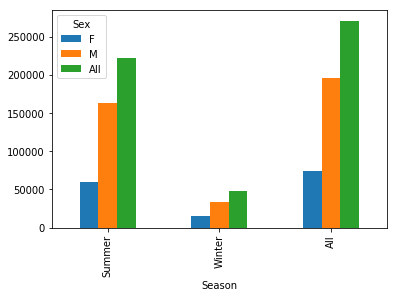

In [5]:
plot_1=pd.pivot_table(atheletes,index="Season",columns="Sex",aggfunc="count",values="ID",margins=True)
plot_1.plot(kind="bar")
print(plot_1)

Sex             F          M
Season                      
Summer  26.709713  73.290287
Winter  31.049749  68.950251
All     27.487127  72.512873


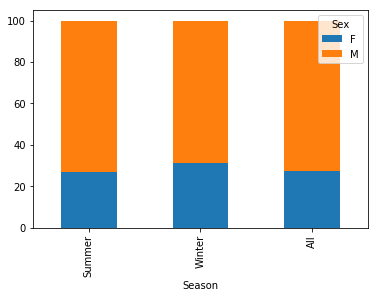

In [6]:
plot_1p = plot_1.iloc[:,0:2].div(plot_1.iloc[:,-1]/100,axis=0)
print(plot_1p)
plot_1p.plot(kind="bar",stacked=True)

Proportions for male and female during both season are same.

Sex         F         M     All
Year                           
1896      NaN     380.0     380
1900     33.0    1903.0    1936
1904     16.0    1285.0    1301
1906     11.0    1722.0    1733
1908     47.0    3054.0    3101
1912     87.0    3953.0    4040
1920    134.0    4158.0    4292
1924    261.0    5432.0    5693
1928    437.0    5137.0    5574
1932    369.0    2952.0    3321
1936    549.0    6852.0    7401
1948    761.0    6719.0    7480
1952   1682.0    7676.0    9358
1956   1139.0    5295.0    6434
1960   1730.0    7505.0    9235
1964   1752.0    7728.0    9480
1968   2193.0    8286.0   10479
1972   2608.0    9351.0   11959
1976   2606.0    7896.0   10502
1980   2186.0    6751.0    8937
1984   2983.0    8605.0   11588
1988   4223.0   10453.0   14676
1992   5178.0   11235.0   16413
1994   1105.0    2055.0    3160
1996   5008.0    8772.0   13780
1998   1384.0    2221.0    3605
2000   5431.0    8390.0   13821
2002   1582.0    2527.0    4109
2004   5546.0    7897.0   13443
2006   1

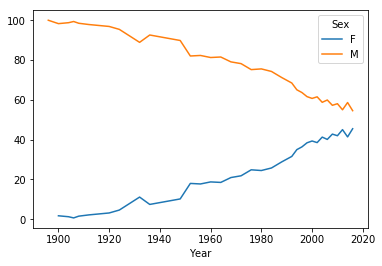

In [7]:
# Yearly male female propoortions.
pivot_2 = pd.pivot_table(atheletes,index="Year",columns="Sex",values="ID",aggfunc="count",margins=True)
print(pivot_2)
pivot_2p = pivot_2.div(pivot_2.iloc[:,-1]/100,axis=0)
print("\n\nPercent table -- \n",pivot_2p)
pivot_2p.iloc[0:len(pivot_2p)-1:,0:2].plot()

As the years passes, Proportion between Male and female participation becomes equal.

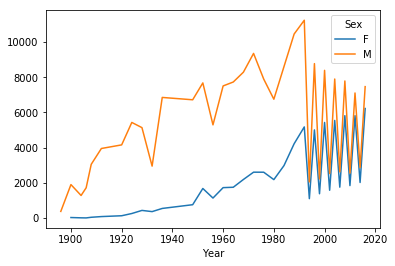

In [8]:
pivot_2.iloc[0:len(pivot_2)-1,0:2].plot()

obeserving a fluctuations in the data, This may be because of season variations. So split the graph for season.

Season   Summer             Winter              All
Sex           F         M        F        M        
Year                                               
1896        NaN     380.0      NaN      NaN     380
1900       33.0    1903.0      NaN      NaN    1936
1904       16.0    1285.0      NaN      NaN    1301
1906       11.0    1722.0      NaN      NaN    1733
1908       47.0    3054.0      NaN      NaN    3101
1912       87.0    3953.0      NaN      NaN    4040
1920      134.0    4158.0      NaN      NaN    4292
1924      244.0    4989.0     17.0    443.0    5693
1928      404.0    4588.0     33.0    549.0    5574
1932      347.0    2622.0     22.0    330.0    3321
1936      468.0    6038.0     81.0    814.0    7401
1948      628.0    5777.0    133.0    942.0    7480
1952     1497.0    6773.0    185.0    903.0    9358
1956      893.0    4234.0    246.0   1061.0    6434
1960     1435.0    6684.0    295.0    821.0    9235
1964     1348.0    6354.0    404.0   1374.0    9480
1968     177

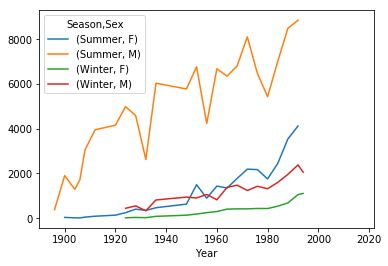

In [9]:
pivot_2s = pd.pivot_table(atheletes,index=["Year"],columns=["Season","Sex"],values="ID",aggfunc="count",margins=True)
print(pivot_2s)
pivot_2s.iloc[0:len(pivot_2)-1,0:4].plot()

Yearly parcipation is increasing.Both Male and female.

In [10]:
# sns.pairplot(atheletes.loc[:,["Age","Height","Weight","Year"]],dropna=True)

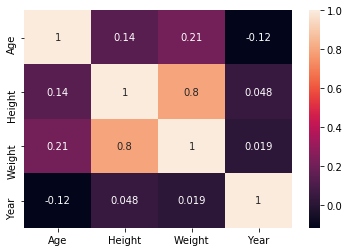

In [11]:
corr=atheletes.loc[:,["Age","Height","Weight","Year"]].corr()
sns.heatmap(corr,annot=True)

Height and weight are higly correlated each other. So we can assume that well maintaining their BMI.

In [15]:
# Merging atheletes and regions Data set.
df = atheletes.merge(regions,how="left",left_on="NOC",right_on="NOC")
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands


In [25]:
# print("Count for regions",df.region.value_counts())
# print("Count or Team",df.Team.value_counts())


# pd.pivot_table(data=df,index="region",columns="Team",values="ID",aggfunc="count",margins=True)
pd.pivot_table(data=df,index="region",values="Team",aggfunc="count",margins=True)
# Showing the number of Participants from each Region


,Team
region,
Afghanistan,126
Albania,70
Algeria,551
American Samoa,37
Andorra,169
Angola,267
Antigua,133
Argentina,3297
Armenia,221


In [26]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
dtype: int64

In [29]:
# We have many missing values. Since not all the Participant atheletes could win medals, Let replace these missing values by 
# not win or "DNW"
df["Medal"].fillna("DNW",inplace=True)

In [41]:
df.loc[df.region.isnull(),["Team","NOC"]].drop_duplicates()


,Team,NOC
578,Singapore,SGP
6267,Refugee Olympic Athletes,ROT
44376,June Climene,SGP
61080,Unknown,UNK
64674,Tuvalu,TUV
80986,Rika II,SGP
108582,Singapore-2,SGP
235895,Singapore-1,SGP


In [44]:
# So We have to make manual modifications in the data.

df.loc[df["NOC"]=="SGP",["region"]]="Singapore"
df.loc[df["NOC"]=="ROT",["region"]]="Refugee Olympic Athletes"
df.loc[df["NOC"]=="UNK",["region"]]="Unknown"
df.loc[df["NOC"]=="TUV",["region"]]="Tuvalu"

# df.loc[df["NOC"]=="SGP",["region"]].drop_duplicates()




count    261642.000000
mean         25.556898
std           6.393561
min          10.000000
25%          21.000000
50%          24.000000
75%          28.000000
max          97.000000
Name: Age, dtype: float64

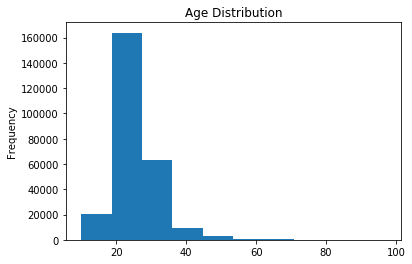

In [48]:
# Analysis By Age.

df.Age.plot(kind="hist",title="Age Distribution")
df.Age.describe()


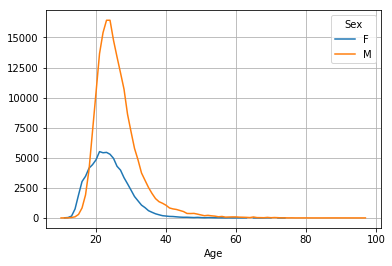

In [71]:
# df.Age.plot(kind="hist",title="Age Distribution",grid=True,colormap="winter_r")
age_plot = pd.pivot_table(data=df,index="Age",columns="Sex",values="ID",aggfunc="count",margins=True)
age_plot = pd.DataFrame(age_plot)
age_plot.iloc[0:len(age_plot)-1,0:2].plot(grid="True")

In [72]:
# Females are strting bit earlier than male,
# NUmber of male participation between age 18 to 25 more than female.

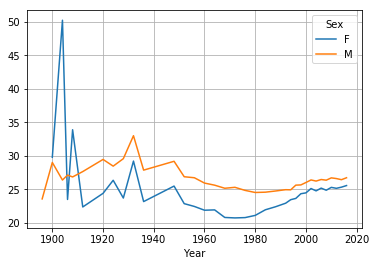

In [84]:
# Lets compare the same over the years.
age_year_plot = pd.pivot_table(data=df,index="Year",columns=["Sex"],values="Age",aggfunc="mean",margins=True)
age_year_plot = pd.DataFrame(age_year_plot)
# age_year_plot.fillna(0,inplace=True)


age_year_plot.iloc[0:len(age_year_plot)-1,0:2].plot(grid="True")

# For females, average age was high in the past.later average male age became high.


In [108]:
#  Analsis By TEAM.
# Total Number of Teams Participated (Unique).

# df["Team"].count_values()

len(df["Team"].drop_duplicates()) # 1184 Unique Teams and 206 Countries.

## Num of Countries Distribution Over the years.
team_year_plot = pd.pivot_table(data=df,index="Year",columns="region",values="ID",aggfunc="count",margins=True)
team_year_plot = pd.DataFrame(team_year_plot)
team_year_plot.head()


region,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua,Argentina,Armenia,Aruba,...,Uzbekistan,Vanuatu,Venezuela,Vietnam,"Virgin Islands, British","Virgin Islands, US",Yemen,Zambia,Zimbabwe,All
Year,,,,,,,,,,,,,,,,,,,,,
1896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,380
1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1936
1904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1301
1906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1733
1908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3101


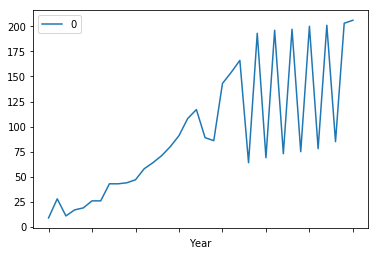

In [118]:
team_tot = pd.DataFrame(206 - team_year_plot.isnull().sum(axis=1))
team_tot.plot()  ## Number of Particiption is increasing yearly

In [ ]:
## MEDAL WINNERS
